
# **Course Title:** Data Analytics
# **Lecturer Name:** Satya Prakash
# **Module/Subject Title:** B9DA109 MACHINE LEARNING AND PATTERN RECOGNITION (B9DA109_2324_TMD1S)
# **Assignment Title:** CA_2
# **Task 3**  :
(https://drive.google.com/file/d/160Ft_HgIbOKBF_3aSQwb2Jca0_wWUG3t/view?usp=sharing) Using the Poem file available here, perform text analytics to understand the Genre described within Poem. You must perform appropriate pre-processing for text data and create a word cloud illustrating the frequency of the top 15 words used in each type of genre (affection, death, and environment, and music so 4 word clouds in total).
Next, build a simple classification model (such as a Naive Bayes classifier or Logistic Regression) to predict the genre of the poem. Remember to divide your data into training and testing sets appropriately.
Then, evaluate your model using appropriate metrics (e.g., accuracy, precision, recall, F1-score) and present these results in a well-structured confusion matrix.
Finally, based on the word frequency word clouds and the performance of your sentiment analysis model, provide a short text (max 200 words) summary of the findings and their implications.  

# **Student number & name as per ID card:**   
* 20016170 - David Ninan
* 20016392 - Suprith Swamy
* 20006747 - Sarvesh Pandey

Colab Project Link : https://colab.research.google.com/drive/1gTp86oP9DS9otg0q0FDpIUFhQQT50M42?usp=sharing

Question 3 Dataset Link : https://drive.google.com/file/d/160Ft_HgIbOKBF_3aSQwb2Jca0_wWUG3t/view?usp=sharing

In [63]:
import re, nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
import joblib
import matplotlib.pyplot as plt
import PIL.Image
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Reading the file

In [64]:
df = pd.read_csv("/content/Poem_Data.csv")
pd.set_option('display.max_colwidth', None) # Setting this so we can see the full content of cells
pd.set_option('display.max_columns', None) # to make sure we can see all the columns in output window

In [65]:
# Check the column names in your DataFrame
print(df.columns)

Index(['Genre', 'Poem'], dtype='object')


# Handling Missing Values

In [66]:
# fill missing values with = ' '
df.fillna(' ', inplace=True)

In [67]:
df.isnull().sum()

Genre    0
Poem     0
dtype: int64

In [68]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Stemming is the process of reducing a word to its Root Word

In [70]:
port_stem = PorterStemmer()

In [71]:
def stemming(Poem):
  stemmed_Poem = re.sub('[^a-zA-Z]',' ',Poem)
  stemmed_Poem = stemmed_Poem.lower()
  stemmed_Poem = stemmed_Poem.split()
  stemmed_Poem = [port_stem.stem(word) for word in stemmed_Poem if not word in stopwords.words('english')]
  stemmed_Poem = ' '.join(stemmed_Poem)
  return stemmed_Poem

In [72]:
df['Poem'] = df['Poem'].apply(stemming)

In [73]:
print(df['Poem'])

0                                                                                               thick brushthey spend hottest part day soak hoovesin trickl mountain water ravin hoardson behalf oleand
1                                                                                                                                           storm gener someth easi surrend sit window step garden bore
2                                          ana mendieta carri around matin star hold forest fire one hand would wake radiat shimmer gleam lucero light morn would measur wingspan idea take night would
3                                                                        aja sherrard portent may memori wallac stevenshow hard carri score adult back look carrion need distressof loyalti requir pain
4                                                                                        bob marley bavaria novemb brilliant morn fish boat dream die man midwint world cover light shadow dream st ann


# Splitting the data to dependent and independent variables

In [74]:
X = df['Poem']
y = df['Genre']

# Text Vectorization

In [75]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Word cloud illustrating the frequency of the top 15 words

In [76]:
def get_most_common_words(genre, n=15):
    genre_rows = df[df['Genre'] == genre]

    # Combine all poems into a single string
    all_poems = ' '.join(genre_rows['Poem'].astype(str).tolist())

    # Tokenize the words
    words = word_tokenize(all_poems.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]

    # Get the frequency distribution of words
    freq_dist = FreqDist(words)

    # Get the most common words
    common_words = freq_dist.most_common(n)

    return common_words

In [77]:
affection_words_list = get_most_common_words('Affection')
music_words_list = get_most_common_words('Music')
death_words_list = get_most_common_words('Death')
environment_words_list = get_most_common_words('Environment')

In [78]:
affection_words = []
for word, _ in affection_words_list:
    affection_words.append(word)

music_words = []
for word, _ in music_words_list:
    music_words.append(word)

death_words = []
for word, _ in death_words_list:
    death_words.append(word)

environment_words = []
for word, _ in environment_words_list:
    environment_words.append(word)

In [79]:
print("Affection:", affection_words)
print("Music:", music_words)
print("Death:", death_words)
print("Environment:", environment_words)

Affection: ['love', 'like', 'come', 'day', 'look', 'heart', 'white', 'eye', 'said', 'morn', 'one', 'never', 'know', 'flower', 'us']
Music: ['like', 'one', 'say', 'love', 'let', 'bodi', 'man', 'day', 'way', 'time', 'mani', 'light', 'come', 'make', 'look']
Death: ['die', 'one', 'like', 'day', 'dead', 'death', 'night', 'white', 'mother', 'love', 'know', 'thing', 'heart', 'see', 'go']
Environment: ['tree', 'like', 'one', 'night', 'sun', 'sky', 'day', 'white', 'moon', 'wind', 'see', 'green', 'blue', 'still', 'come']


# Word cloud for Affection

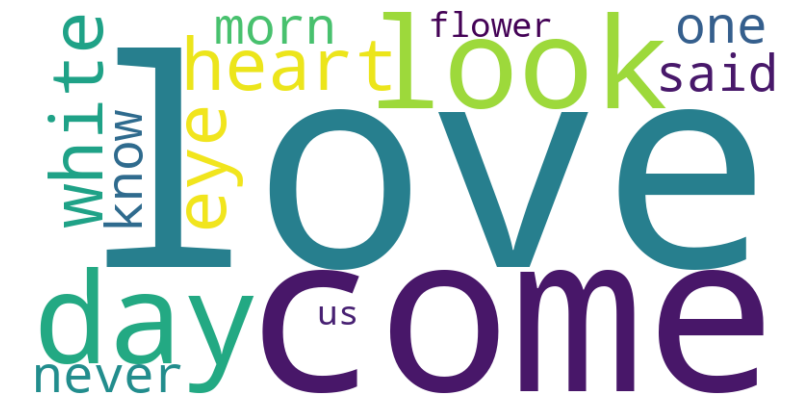

In [80]:
# List of affection words
#affection_words = ["love", "like", "come", "day", "look", "heart", "white", "eye", "said", "morn","one","never","know","flower","us"]

# Convert the list to a string
affection_text = ' '.join(affection_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(affection_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Word cloud for Music

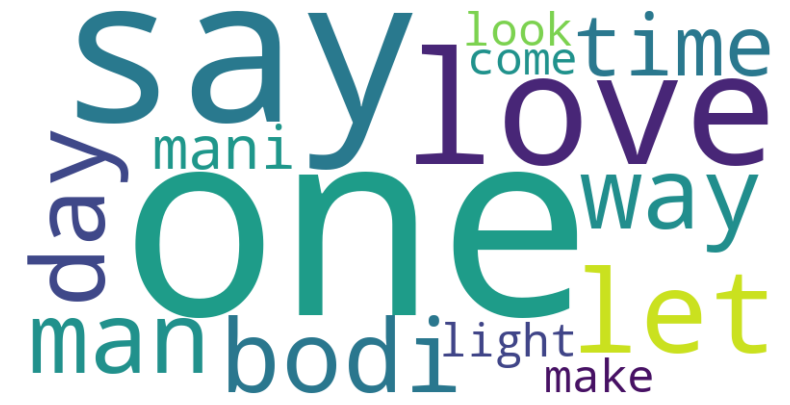

In [81]:
# List of music words
# music_words = ["like", "one", "say", "love", "let", "bodi", "man", "day", "way", "time","mani","light","come","way","look"]

# Convert the list to a string
music_text = ' '.join(music_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(music_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Word cloud for Death

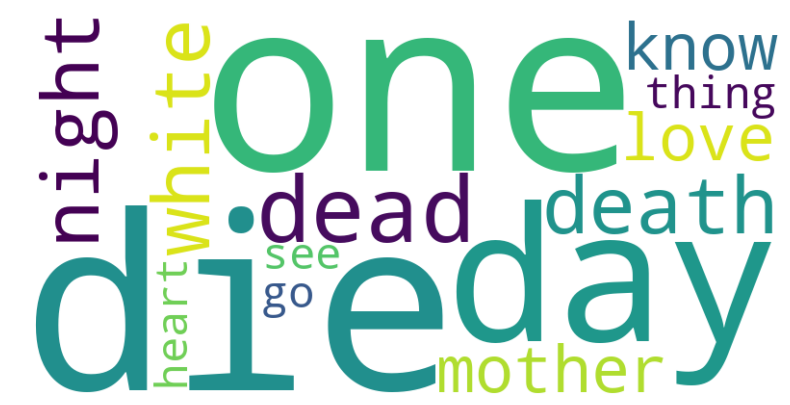

In [82]:
# List of death words
# death_words = ["die","one", "like","day","dead","death","death","night","white","mother","love","know","thing","heart","see","go"]

# Convert the list to a string
death_text = ' '.join(death_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(death_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Word cloud for Environment

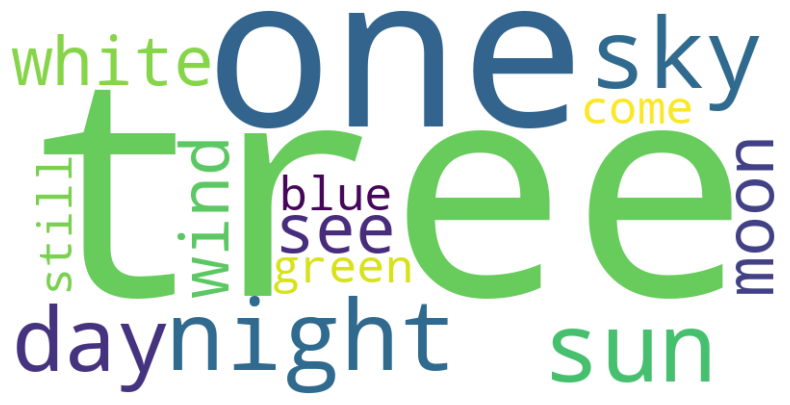

In [83]:
# List of environment words
# environment_words = ["tree","one", "like","night","sun","sky","day","white","moon","wind","see","green","blue","still","come"]

# Convert the list to a string
environment_text = ' '.join(environment_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(environment_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Data Preprocessing

In [84]:
def cleaner(poem):
    soup = BeautifulSoup(poem, 'lxml') # removing HTML entities such as ‘&amp’,’&quot’,'&gt'; lxml is the html parser and shoulp be installed using 'pip install lxml'
    souped = soup.get_text()
    re1 = re.sub(r"(@|http://|https://|www|\\x)\S*", " ", souped) # substituting @mentions, urls, etc with whitespace
    re2 = re.sub("[^A-Za-z]+"," ", re1) # substituting any non-alphabetic character that repeats one or more times with whitespace

    tokens = nltk.word_tokenize(re2)
    lower_case = [t.lower() for t in tokens]

    stop_words = set(stopwords.words('english'))
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))

    wordnet_lemmatizer = WordNetLemmatizer()
    lemmas = [wordnet_lemmatizer.lemmatize(t,'v') for t in filtered_result]
    return lemmas

In [85]:
df.to_csv('Cleaned_file.csv', index=False)

In [86]:
df.to_excel('Excel_Cleaned.xlsx',index=False)

# Splitting the data into train and test

In [87]:
df['cleaned_poem'] = df.Poem.apply(cleaner)
df = df[df['cleaned_poem'].map(len) > 0] # removing rows with cleaned poems of length 0
print("Printing top 5 rows of dataframe showing original and cleaned poems....")
print(df[['Poem','cleaned_poem']].head())
df.drop(['Poem'], axis=1, inplace=True)
# Saving cleaned poems to csv
df.to_csv('cleaned_data.csv', index=False)
df['cleaned_poem'] = [" ".join(row) for row in df['cleaned_poem'].values] # joining tokens to create strings. TfidfVectorizer does not accept tokens as input
data = df['cleaned_poem']
Y = df['Genre'] # target column
tfidf = TfidfVectorizer(min_df=.00015, ngram_range=(1,3)) # min_df=.00015 means that each ngram (unigram, bigram, & trigram) must be present in at least 30 documents for it to be considered as a token (200000*.00015=30). This is a clever way of feature engineering
tfidf.fit(data) # learn vocabulary of entire data
data_tfidf = tfidf.transform(data) # creating tfidf values
pd.DataFrame(pd.Series(tfidf.get_feature_names_out())).to_csv('vocabulary.csv', header=False, index=False)
print("Shape of tfidf matrix: ", data_tfidf.shape)

Printing top 5 rows of dataframe showing original and cleaned poems....
                                                                                                                                                           Poem  \
0                                                       thick brushthey spend hottest part day soak hoovesin trickl mountain water ravin hoardson behalf oleand   
1                                                                                                   storm gener someth easi surrend sit window step garden bore   
2  ana mendieta carri around matin star hold forest fire one hand would wake radiat shimmer gleam lucero light morn would measur wingspan idea take night would   
3                                aja sherrard portent may memori wallac stevenshow hard carri score adult back look carrion need distressof loyalti requir pain   
4                                                bob marley bavaria novemb brilliant morn fish boat dream die man

In [88]:
df.isnull().sum()

Genre           0
cleaned_poem    0
dtype: int64

In [89]:
from collections import Counter
Counter(Y)

Counter({'Music': 238, 'Death': 231, 'Affection': 141, 'Environment': 227})

# Implementing Naive Bayes classifier

In [90]:
nbc_clf = MultinomialNB()

# Model evaluation

In [91]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) # 10-fold cross-validation
scores=[]
iteration = 0
for train_index, test_index in kf.split(data_tfidf, Y):
    iteration += 1
    print("Iteration ", iteration)
    X_train, Y_train = data_tfidf[train_index], Y[train_index]
    X_test, Y_test = data_tfidf[test_index], Y[test_index]
    nbc_clf.fit(X_train, Y_train)
    Y_pred = nbc_clf.predict(X_test)
    score = metrics.accuracy_score(Y_test, Y_pred) # Calculating accuracy
    print("Cross-validation accuracy: ", score)
    scores.append(score)

Iteration  1
Cross-validation accuracy:  0.4166666666666667
Iteration  2
Cross-validation accuracy:  0.4166666666666667
Iteration  3
Cross-validation accuracy:  0.4642857142857143
Iteration  4
Cross-validation accuracy:  0.36904761904761907
Iteration  5
Cross-validation accuracy:  0.4166666666666667
Iteration  6
Cross-validation accuracy:  0.44047619047619047
Iteration  7
Cross-validation accuracy:  0.42857142857142855
Iteration  8
Cross-validation accuracy:  0.39759036144578314
Iteration  9
Cross-validation accuracy:  0.42168674698795183
Iteration  10
Cross-validation accuracy:  0.42168674698795183


# Metrics

In [92]:
from sklearn.metrics import accuracy_score, classification_report

In [93]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

classification_rep = classification_report(Y_test, Y_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.42
Classification Report:
              precision    recall  f1-score   support

   Affection       0.00      0.00      0.00        15
       Death       0.38      0.35      0.36        23
 Environment       0.62      0.59      0.60        22
       Music       0.34      0.61      0.44        23

    accuracy                           0.42        83
   macro avg       0.34      0.39      0.35        83
weighted avg       0.36      0.42      0.38        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:

from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) # 10-fold cross-validation
scores=[]
iteration = 0
for train_index, test_index in kf.split(data_tfidf, Y):
    iteration += 1
    print("Iteration ", iteration)
    X_train, Y_train = data_tfidf[train_index], Y[train_index]
    X_test, Y_test = data_tfidf[test_index], Y[test_index]
    logReg.fit(X_train, Y_train)
    Y_pred = logReg.predict(X_test)
    score = metrics.accuracy_score(Y_test, Y_pred) # Calculating accuracy
    print("Cross-validation accuracy: ", score)
    scores.append(score)

Iteration  1
Cross-validation accuracy:  0.39285714285714285
Iteration  2
Cross-validation accuracy:  0.4166666666666667
Iteration  3
Cross-validation accuracy:  0.47619047619047616
Iteration  4
Cross-validation accuracy:  0.34523809523809523
Iteration  5
Cross-validation accuracy:  0.4523809523809524
Iteration  6
Cross-validation accuracy:  0.4523809523809524
Iteration  7
Cross-validation accuracy:  0.4166666666666667
Iteration  8
Cross-validation accuracy:  0.42168674698795183
Iteration  9
Cross-validation accuracy:  0.43373493975903615
Iteration  10
Cross-validation accuracy:  0.43373493975903615


In [98]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

classification_rep = classification_report(Y_test, Y_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.43
Classification Report:
              precision    recall  f1-score   support

   Affection       0.00      0.00      0.00        15
       Death       0.43      0.26      0.32        23
 Environment       0.63      0.55      0.59        22
       Music       0.36      0.78      0.49        23

    accuracy                           0.43        83
   macro avg       0.36      0.40      0.35        83
weighted avg       0.39      0.43      0.38        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Summary

The word frequency analysis across different themes—Affection, Music, Death, and Environment—reveals most used words and patterns in language.

In expressions of Affection, 'love' dominates as one would expect. Most likely word other than 'love' are 'Like', 'Look' and 'heart'.

The Music category have most used words such as 'One', 'say' and 'love'. These are  

In the Death category, the prevalence of 'die' and 'dead' is obivous, with 'love' appearing aswell. appereance of words 'One', 'day' leads to tends to the question of them being joint words is such category.

The Environment category have words that relate to nature, with 'tree,' 'sun,' and 'moon' standing out. Along with words such as 'night' and 'wind'.

'Dead' and 'Death' are unusal occurence in environment category, we can assume this would relate to climate change and natural occuring disasters being highlight.

Considering these insights of our sentiment analysis model we can better train the models to understand the context in which the sentences are used.
Therefore find the prevelant emotions among the source.

From this dataset, word 'love' has prevaled is all catgories unfortunately with the exception environment.

Our model has an accuracy of 42% using Navie Bayes and 43% using Logistic Regression. Hence with further fine tuning and implentation of normalization and min_max scaling. We can hope to find better results.
